In [39]:
import pandas as pd
import urllib
import urllib.request
import json

In [40]:
ServiceKey='xIVg1U1JSUJAe17YxwZyQ0wJqoVIK5IhZGSmDpVXE2N8BkZKz1Rltk1nEr2hxr57/ECmz6Hmia53ftSGl6ByYw=='

In [41]:
url = 'http://apis.data.go.kr/1360000/VilageFcstInfoService/getVilageFcst'

xylist = pd.read_excel("기상청18_동네예보 조회서비스_오픈API활용가이드_격자_위경도(20210401).xlsx") 
uniq_xylist = xylist[['격자 X', '격자 Y']].drop_duplicates()

In [42]:
xylist

,구분,행정구역코드,1단계,2단계,3단계,격자 X,격자 Y,경도(시),경도(분),경도(초),위도(시),위도(분),위도(초),경도(초/100),위도(초/100),위치업데이트
0,kor,1100000000,서울특별시,NaN,NaN,60,127,126,58,48.03,37,33,48.85,126.980008,37.563569,NaN
1,kor,1111000000,서울특별시,종로구,NaN,60,127,126,58,53.91,37,34,13.36,126.981642,37.570378,NaN
2,kor,1111051500,서울특별시,종로구,청운효자동,60,127,126,58,14.35,37,35,2.89,126.970652,37.584137,NaN
3,kor,1111053000,서울특별시,종로구,사직동,60,127,126,58,15.44,37,34,23.77,126.970956,37.573269,NaN
4,kor,1111054000,서울특별시,종로구,삼청동,60,127,126,59,2.32,37,34,56.73,126.983978,37.582425,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3769,kor,5013060000,제주특별자치도,서귀포시,대천동,52,32,126,28,46.47,33,14,50.91,126.479575,33.247475,NaN
3770,kor,5013061000,제주특별자치도,서귀포시,중문동,51,32,126,26,12.40,33,14,53.44,126.436778,33.248178,NaN
3771,kor,5013062000,제주특별자치도,서귀포시,예래동,50,32,126,23,59.67,33,15,3.69,126.399908,33.251025,NaN
3772,kor,5019000000,이어도,NaN,NaN,28,8,0,0,0.00,0,0,0.00,0.000000,0.000000,NaN


In [74]:
count = 0
for i in xylist['1단계']:
    if i=='울산광역시':
        if xylist['2단계'][count] == '남구':
            if xylist['3단계'][count]=='선암동':
                print(count)
    count+=1

1205


In [76]:
xylist.iloc[1205]

구분                  kor
행정구역코드       3114064000
1단계               울산광역시
2단계                  남구
3단계                 선암동
격자 X                102
격자 Y                 83
경도(시)               129
경도(분)                20
경도(초)                15
위도(시)                35
위도(분)                30
위도(초)              35.5
경도(초/100)       129.338
위도(초/100)       35.5099
위치업데이트              NaN
Name: 1205, dtype: object

In [79]:
nx = xylist['격자 X'][1205]
ny=xylist['격자 Y'][1205]
latitude = xylist['위도(초/100)'][1205]
longitude = xylist['경도(초/100)'][1205]

In [57]:
from datetime import date, timedelta
base_date = date.today() - timedelta(1)
base_date = base_date.strftime("%Y%m%d")
base_time ='1400'

In [58]:
base_date

'20210611'

In [59]:
#ulsan solar power weather forecast
queryParams = '?' + urllib.parse.urlencode(
    {
        urllib.parse.quote_plus('ServiceKey') : ServiceKey, 
        urllib.parse.quote_plus('numOfRows') : '113', 
        urllib.parse.quote_plus('dataType') : 'JSON', 
        urllib.parse.quote_plus('base_date') : base_date, 
        urllib.parse.quote_plus('base_time') : base_time, 
        urllib.parse.quote_plus('nx') : '102', 
        urllib.parse.quote_plus('ny') : '83'
    }
)

response = urllib.request.urlopen(url + queryParams).read()
response = json.loads(response)

In [60]:
response

{'response': {'header': {'resultCode': '00', 'resultMsg': 'NORMAL_SERVICE'},
  'body': {'dataType': 'JSON',
   'items': {'item': [{'baseDate': '20210611',
      'baseTime': '1400',
      'category': 'POP',
      'fcstDate': '20210611',
      'fcstTime': '1800',
      'fcstValue': '60',
      'nx': 102,
      'ny': 83},
     {'baseDate': '20210611',
      'baseTime': '1400',
      'category': 'PTY',
      'fcstDate': '20210611',
      'fcstTime': '1800',
      'fcstValue': '1',
      'nx': 102,
      'ny': 83},
     {'baseDate': '20210611',
      'baseTime': '1400',
      'category': 'R06',
      'fcstDate': '20210611',
      'fcstTime': '1800',
      'fcstValue': '8.3',
      'nx': 102,
      'ny': 83},
     {'baseDate': '20210611',
      'baseTime': '1400',
      'category': 'REH',
      'fcstDate': '20210611',
      'fcstTime': '1800',
      'fcstValue': '90',
      'nx': 102,
      'ny': 83},
     {'baseDate': '20210611',
      'baseTime': '1400',
      'category': 'S06',
      'fcs

In [61]:
weather_forecast = pd.DataFrame()

weather_forecast['Forecast_time'] = [f'{base_date} {hour}:00' for hour in range(24)]
row_idx = 0

for i, data in enumerate(response['response']['body']['items']['item']):
    if i > 19:
        if data['category']=='REH':
            weather_forecast.loc[row_idx, 'Humidity'] = float(data['fcstValue'])
            print('category:Humidity,',data['category'], 'baseTime:',data['baseTime'], ', fcstTime:', data['fcstTime'], ', fcstValue:', data['fcstValue'])
        elif data['category']=='T3H':
            weather_forecast.loc[row_idx, 'Temperature'] = float(data['fcstValue'])
            print('category:Temperature,',data['category'], 'baseTime:',data['baseTime'], ', fcstTime:', data['fcstTime'], ', fcstValue:', data['fcstValue'])
        elif data['category']=='SKY':
            weather_forecast.loc[row_idx, 'Cloud'] = float(data['fcstValue'])
            print('category:Cloud,',data['category'], 'baseTime:',data['baseTime'], ', fcstTime:', data['fcstTime'], ', fcstValue:', data['fcstValue'])
        elif data['category']=='VEC':
            weather_forecast.loc[row_idx, 'WindDirection'] = float(data['fcstValue'])
            print('category:WindDirection,',data['category'], 'baseTime:',data['baseTime'], ', fcstTime:', data['fcstTime'], ', fcstValue:', data['fcstValue'])
        elif data['category']=='WSD':
            weather_forecast.loc[row_idx, 'WindSpeed'] = float(data['fcstValue'])
            print('category:WindSpeed,',data['category'], 'baseTime:',data['baseTime'], ', fcstTime:', data['fcstTime'], ', fcstValue:', data['fcstValue'], '\n')
            row_idx+=3

category:Humidity, REH baseTime: 1400 , fcstTime: 0000 , fcstValue: 90
category:Cloud, SKY baseTime: 1400 , fcstTime: 0000 , fcstValue: 4
category:Temperature, T3H baseTime: 1400 , fcstTime: 0000 , fcstValue: 23
category:WindDirection, VEC baseTime: 1400 , fcstTime: 0000 , fcstValue: 232
category:WindSpeed, WSD baseTime: 1400 , fcstTime: 0000 , fcstValue: 2.3 

category:Humidity, REH baseTime: 1400 , fcstTime: 0300 , fcstValue: 95
category:Cloud, SKY baseTime: 1400 , fcstTime: 0300 , fcstValue: 3
category:Temperature, T3H baseTime: 1400 , fcstTime: 0300 , fcstValue: 21
category:WindDirection, VEC baseTime: 1400 , fcstTime: 0300 , fcstValue: 242
category:WindSpeed, WSD baseTime: 1400 , fcstTime: 0300 , fcstValue: 1.7 

category:Humidity, REH baseTime: 1400 , fcstTime: 0600 , fcstValue: 95
category:Cloud, SKY baseTime: 1400 , fcstTime: 0600 , fcstValue: 1
category:Temperature, T3H baseTime: 1400 , fcstTime: 0600 , fcstValue: 21
category:WindDirection, VEC baseTime: 1400 , fcstTime: 0600 

In [62]:
weather_forecast = weather_forecast.interpolate()
weather_forecast = weather_forecast.iloc[:24]
weather_forecast

,Forecast_time,Humidity,Cloud,Temperature,WindDirection,WindSpeed
0,20210611 0:00,90.000000,4.000000,23.000000,232.000000,2.300000
1,20210611 1:00,91.666667,3.666667,22.333333,235.333333,2.100000
2,20210611 2:00,93.333333,3.333333,21.666667,238.666667,1.900000
3,20210611 3:00,95.000000,3.000000,21.000000,242.000000,1.700000
4,20210611 4:00,95.000000,2.333333,21.000000,263.666667,1.466667
5,20210611 5:00,95.000000,1.666667,21.000000,285.333333,1.233333
6,20210611 6:00,95.000000,1.000000,21.000000,307.000000,1.000000
7,20210611 7:00,88.333333,1.000000,22.333333,322.000000,0.900000
8,20210611 8:00,81.666667,1.000000,23.666667,337.000000,0.800000
9,20210611 9:00,75.000000,1.000000,25.000000,352.000000,0.700000


<AxesSubplot:>

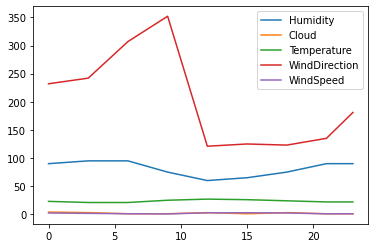

In [63]:
weather_forecast.plot()

In [64]:
weather_forecast.to_csv('weather_forecast.csv', mode="w")